In [35]:
import pandas as pd
import numpy as np

from torch.utils.data import DataLoader
from rdkit.Chem import Draw, AllChem
from src_chung.get_reaction_data import get_graph_data

from src_chung.dataset import GraphDataset
from src_chung.model import reactionMPNN, training, inference
from src_chung.util import collate_reaction_graphs


In [4]:
data=pd.read_csv('./data_chung/schneider50k.tsv',sep='\t',index_col=0)
data.head()

,original_rxn,rxn_class,source,rxn,split
0,[CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...,6.1.5,US06887874,C1CCCCC1.CCO.CS(=O)(=O)N1CCN(Cc2ccccc2)CC1.[OH...,test
1,O.O.[Na+].[CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[...,7.1.1,US07056926,CCOC(C)=O.Cc1cc([N+](=O)[O-])ccc1NC(=O)c1ccccc...,test
2,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...,1.8.5,US08492378,COc1ccc(-c2coc3ccc(-c4nnc(S)o4)cc23)cc1.COc1cc...,test
3,Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl....,2.2.3,US08592454,CCS(=O)(=O)Cl.CN(C(=O)N(C)[C@@H]1CN(C(=O)C2CCN...,train
4,[CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...,1.3.7,US06716851,COc1ccc(OC)c(N)c1.Cc1cc(Cl)nc(-c2ccccn2)n1>>CO...,test


C1CCCCC1.CCO.CS(=O)(=O)N1CCN(Cc2ccccc2)CC1.[OH-].[OH-].[Pd+2]>>CS(=O)(=O)N1CCNCC1


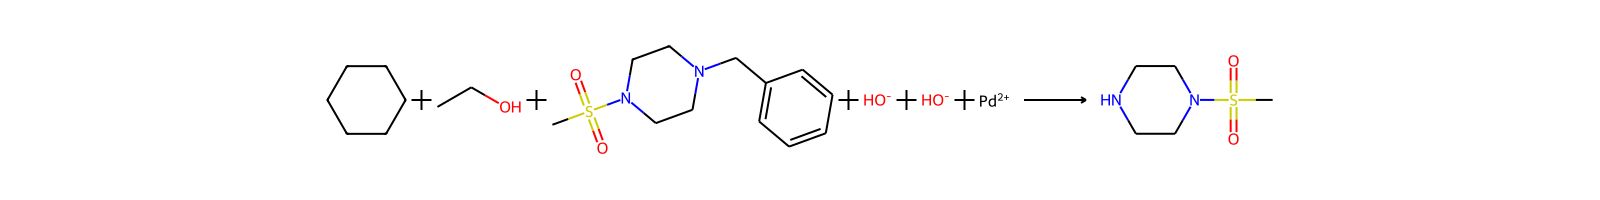

In [24]:
rxn1=data.loc[0,'rxn']
y1=1
rxn_allchem=AllChem.ReactionFromSmarts(rxn1,useSmiles=True)
print(rxn1)
Draw.ReactionToImage(rxn_allchem)


C1CCCCC1.CCO.CS(=O)(=O)N1CCN(Cc2ccccc2)CC1.[OH-].[OH-].[Pd+2]>>CS(=O)(=O)N1CCNCC1


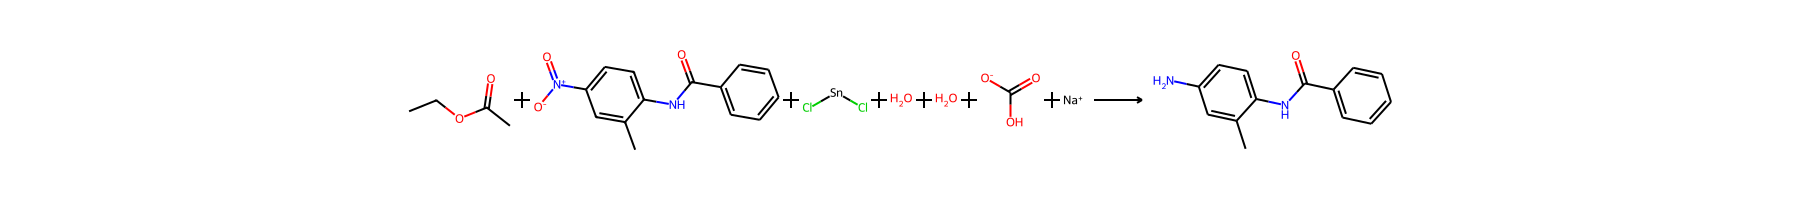

In [25]:
rxn2=data.loc[1,'rxn']
y2=0
rxn_allchem=AllChem.ReactionFromSmarts(rxn2,useSmiles=True)
print(rxn)
Draw.ReactionToImage(rxn_allchem)


In [29]:
#get_data_train
rsmi_list= [rxn1,rxn2]
rmol_max_cnt = np.max([rsmi.split(">>")[0].count(".") + 1  for rsmi in rsmi_list])
pmol_max_cnt = np.max([rsmi.split(">>")[1].count(".") + 1  for rsmi in rsmi_list])
y=[y1,y2]
filename_train='./data_chung/data_draft.npz'
get_graph_data(rsmi_list,y,filename_train,rmol_max_cnt,pmol_max_cnt)

--- generating graph data for ./data_chung/data_draft.npz
--- n_reactions: 2, reactant_max_cnt: 7, product_max_cnt: 1


In [34]:
data_set = GraphDataset('./data_chung/data_draft.npz')

data_loader = DataLoader(
    dataset=data_set,
    batch_size=int(np.min([32, len(data_set)])),
    shuffle=True,
    collate_fn=collate_reaction_graphs,
)

In [37]:
# training
train_y = data_loader.dataset.y

assert len(train_y) == len(data_set)

node_dim = data_set.rmol_node_attr[0].shape[1]
edge_dim = data_set.rmol_edge_attr[0].shape[1]

pretrained_model_path = "./model/pretrained/" + "27407_pretrained_gnn.pt" 

net = reactionMPNN(node_dim, edge_dim, pretrained_model_path)


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [1]:
from keyboard import press
for i in range(5):
    press('enter')

ImportError: You must be root to use this library on linux.

In [5]:
from selenium.webdriver.common.keys import Keys

driver.find_element_by_name("Value").send_keys(Keys.ENTER)


ModuleNotFoundError: No module named 'selenium'

In [4]:
from pynput.keyboard import Key, Controller



ModuleNotFoundError: No module named 'pynput'